##  **Statistical Modeling**
This notebook focuses on building statistical models to analyze historical insurance claims data for AlphaCare Insurance Solutions. The goal is to identify patterns and key factors influencing claim amounts, helping in optimizing marketing strategies and identifying low-risk clients for premium adjustments.

 **Description of Work**
1.  Various models, including Linear Regression, Decision Trees, Random Forests, and XGBoost, are implemented to predict total insurance premium based on different features.

2.  The performance of each model is assessed using evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-square. A comparison is made to identify the best-performing model.

3. Tree-based models provide insights into the most influential features affecting the predictions. SHAP (SHapley Additive exPlanations) is used to interpret model outputs further.



In [1]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [5]:
# importing modules from scripts 
from scripts.statistical_modeling import *

c:\Users\h\Desktop\Week 3\Insurance-Risk-Analytics-Predictive-Modeling\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# load insurance data
df = pd.read_csv('../data/cleaned_insurance_data.csv', low_memory=False, index_col=False)

In [7]:
models = Modelling(df)

In [8]:
# Specify the numeric and categorical features to use 
numeric_features = ['SumInsured', 'CalculatedPremiumPerTerm','RegistrationYear','PostalCode'] 
categorical_features = ['Province', 'CoverType', 'VehicleType', 'make', 'Gender', 'MaritalStatus','PostalCode','Model','CoverCategory','NewVehicle','RegistrationYear','Citizenship' ] 

In [9]:
 features = list(set(numeric_features) | set(categorical_features) - set(['TotalPremium', 'TotalClaims']))

In [10]:
# Encode categorical variables using label encoder
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [11]:
X = df[features]
y_premium = df['TotalPremium']
y_claims= df['TotalClaims']

# split the data
X_train, X_test, y_claims_train, y_claims_test=models.split_data(X,y_claims)
X_train, X_test, y_premium_train, y_premium_test=models.split_data(X,y_premium)

Model Building - Train Linear Regression Model 

In [12]:
model_claim = LinearRegression()
model_premium=LinearRegression()
model_claim.fit(X_train, y_claims_train) 
model_premium.fit(X_train, y_premium_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print ('Totalclaims Linear Regression result')
models.model_testing(model_claim, X_test, y_claims_test)
print('')
print('Total Premium Linear Regression Result')
models.model_testing(model_premium, X_test,y_premium_test)

Totalclaims Linear Regression result
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

Total Premium Linear Regression Result
Mean Absolute Error (MAE): 12.890839317339916
Mean Squared Error (MSE): 310.60410471296575
Root Mean Squared Error (RMSE): 17.62396393303634
R-squared: 0.35507014608973453


## Model Training 

### for TotalClaims

In [14]:
Linear_Regression = LinearRegression()
Linear_Regression .fit(X_train, y_claims_train) 

Decision_Tree = DecisionTreeRegressor(random_state=42)
Decision_Tree.fit(X_train, y_claims_train)

Random_Forest =RandomForestRegressor(n_estimators=100, random_state=42)
Random_Forest.fit(X_train, y_claims_train)

XGBoost= XGBRegressor(n_estimators=100, random_state=42)
XGBoost.fit(X_train, y_claims_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [15]:
model_names = {
    Linear_Regression: "Linear Regression",
    Decision_Tree: "Decision Tree",
    Random_Forest: "Random Forest",
    XGBoost: "XGBoost"
}

for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"{model_names[model]} Model result for TotalClaims")
    
    # Perform model testing
    models.model_testing(model, X_test, y_claims_test)
    print()


Linear Regression Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

Decision Tree Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

Random Forest Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

XGBoost Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0



### Model Training for TotalPremium 

 compare the performance of four machine learning models in predicting Totalpremium:

1. Linear Regression
2. Decision Tree
3. Random Forest
4. XGBoost

In [16]:
Linear_Regression = LinearRegression()
Linear_Regression .fit(X_train, y_premium_train) 

Decision_Tree = DecisionTreeRegressor(random_state=42)
Decision_Tree.fit(X_train, y_premium_train)

Random_Forest =RandomForestRegressor(n_estimators=100, random_state=42)
Random_Forest.fit(X_train, y_premium_train)

XGBoost= XGBRegressor(n_estimators=100, random_state=42)
XGBoost.fit(X_train, y_premium_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [17]:
model_names = {
    Linear_Regression: "Linear Regression",
    Decision_Tree: "Decision Tree",
    Random_Forest: "Random Forest",
    XGBoost: "XGBoost"
}

for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"{model_names[model]} Model result for Totalpremium")
    print('----------------------------------------------------')
    # Perform model testing
    models.model_testing(model, X_test, y_premium_test)
    print()


Linear Regression Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 12.890839317339916
Mean Squared Error (MSE): 310.60410471296575
Root Mean Squared Error (RMSE): 17.62396393303634
R-squared: 0.35507014608973453

Decision Tree Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 6.426340889490351
Mean Squared Error (MSE): 160.3157944298073
Root Mean Squared Error (RMSE): 12.661587358218847
R-squared: 0.6671246763571576

Random Forest Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 6.452419839225311
Mean Squared Error (MSE): 159.835687097132
Root Mean Squared Error (RMSE): 12.642613934512593
R-squared: 0.6681215580700045

XGBoost Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 9.995892686970125
Mean Squared Error (MSE): 226.90786907967166
Root Mean 

| Model             | MAE     | MSE     | RMSE    | R²      |
|-------------------|---------|---------|---------|---------|
| Linear Regression | 12.8908 | 310.6041| 17.6240 | 0.3551  |
| Decision Tree     | 6.4263  | 160.3137| 12.6615 | 0.6671  |
| Random Forest     | 6.4525  | 159.8376| 12.6427 | 0.6681  |
| XGBoost           | 10.0258 | 227.5556| 15.0849 | 0.5275  |

## Analysis

1. **Accuracy (R²)**:
   - Random Forest performs best with an R² of 0.6681, closely followed by Decision Tree (0.6671).
   - XGBoost is third with 0.5275, while Linear Regression performs poorest with 0.3551.

2. **Error Metrics (MAE, MSE, RMSE)**:
   - Decision Tree and Random Forest have the lowest error rates across all metrics.
   - XGBoost performs better than Linear Regression but worse than the other tree-based models.
   - Linear Regression has the highest error rates, further indicating its unsuitability for this problem.

3. **Model Comparison**:
   - The Random Forest model appears to be the best choice for predicting Totalpremium, with the Decision Tree model as a close second.

### scatter plot for each model prediction vs actual values 

Plotting for Linear Regression


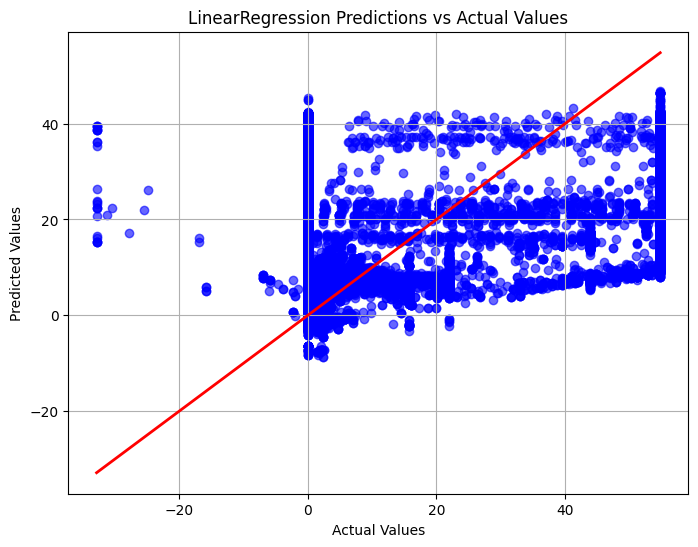


Plotting for Decision Tree


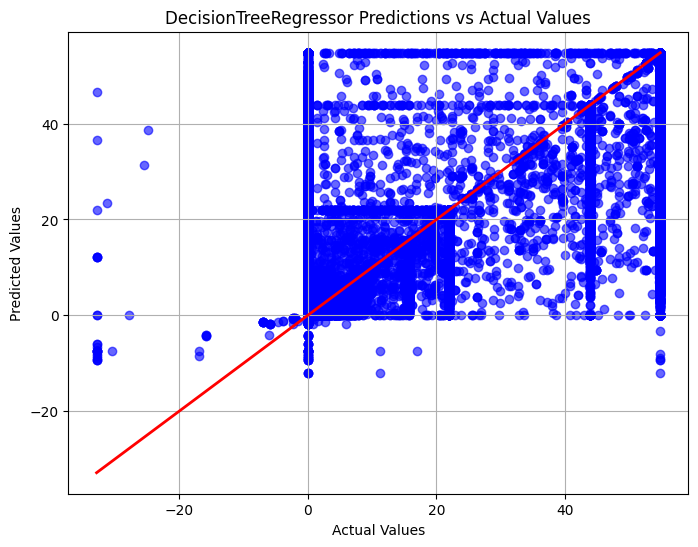


Plotting for Random Forest


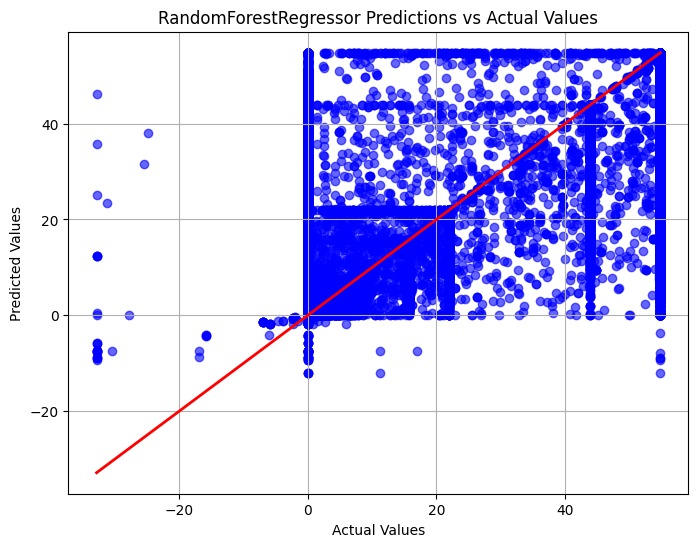


Plotting for XGBoost


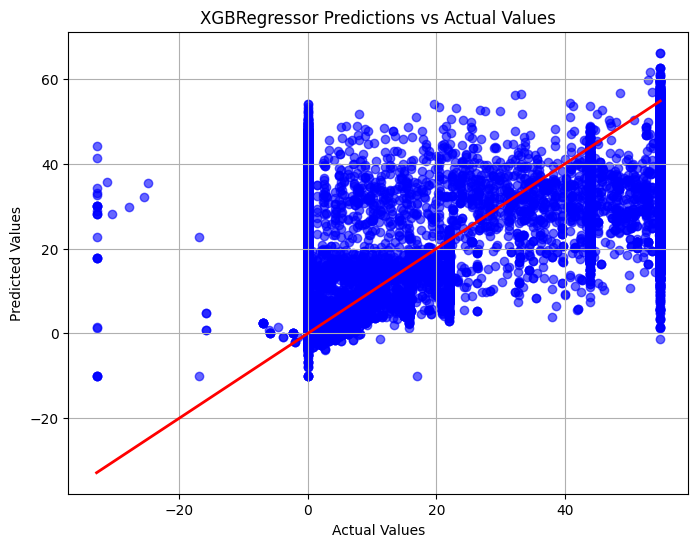

In [18]:
# Loop through your models and plot for each
for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"Plotting for {model_names[model]}")
    plot_predictions_vs_actuals(model, X_test, y_premium_test)
    print()  # Add a space after each plot


### plot for all models predictions on a single scatter plot to compare their performance visually.

c:\Users\h\Desktop\Week 3\Insurance-Risk-Analytics-Predictive-Modeling\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


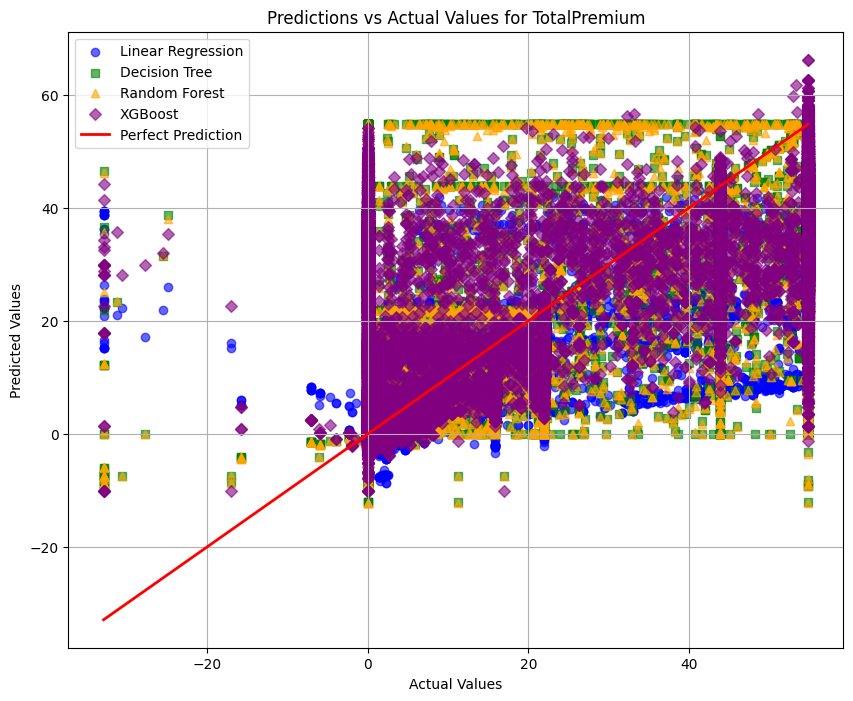

In [19]:
# List of models with their names
models_list = [
    (Linear_Regression, "Linear Regression"),
    (Decision_Tree, "Decision Tree"),
    (Random_Forest, "Random Forest"),
    (XGBoost, "XGBoost")
]
# Call the function to plot all models' predictions on a single scatter plot
plot_all_models_predictions(models_list, X_test, y_premium_test, model_names)


## Feature Importance Analysis using Sharp 
- SHAP (SHapley Additive exPlanations)is Applied to XGBoost model to identify the contribution of each feature to individual predictions

In [20]:
# Initialize SHAP explainer

explainer = shap.Explainer(XGBoost)
shap_values = explainer(X_test)

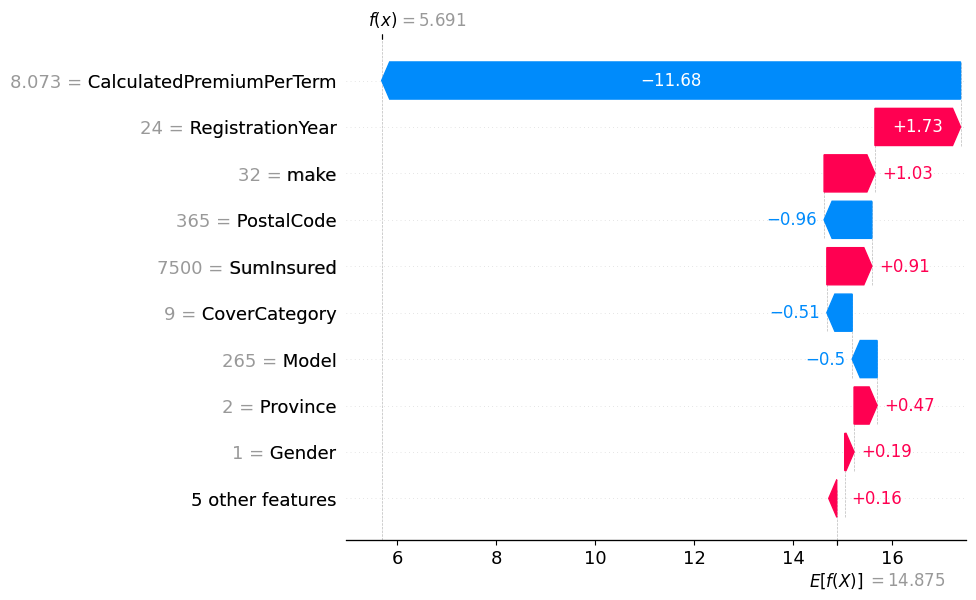

In [21]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

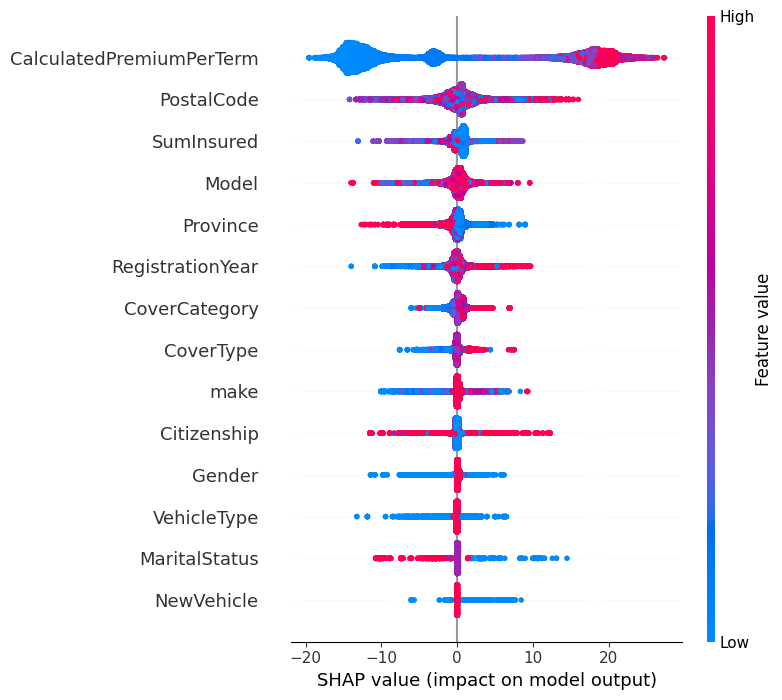

In [22]:
# Plot SHAP values
shap.summary_plot(shap_values, X_test)

- SHAP summary plot illustrating feature importance and their influence on model predictions, with "CalculatedPremiumPerTerm" being the most significant feature

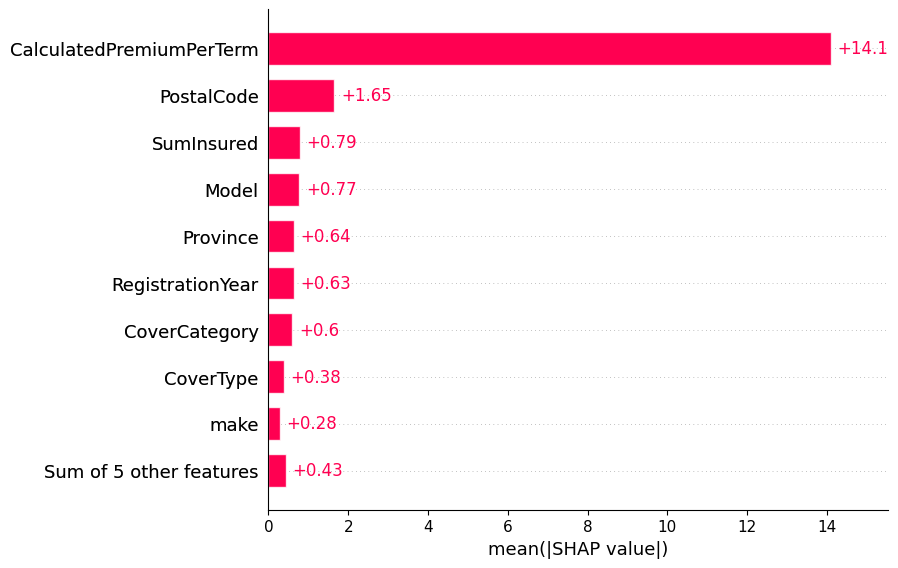

In [23]:
shap.plots.bar(shap_values)